In [302]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [303]:
data = pd.read_csv('./Singapore_new.csv', encoding='ISO-8859-1')
print(data.shape)
data

(33712, 6)


,VenueId,Longitude,Dimension,Category,City,CountryCode
0,4a5eb95bf964a52019bf1fe3,1.335005,103.964682,Office,Singapore,SG
1,4a5f059ff964a52031bf1fe3,1.302169,103.849513,Hotel,Singapore,SG
2,4a73e804f964a52099dd1fe3,1.281391,103.844348,Temple,Singapore,SG
3,4ac7f7f1f964a520e9ba20e3,1.279386,103.840514,Hotel,Singapore,SG
4,4ac8148ff964a5208bbb20e3,1.282644,103.845286,Temple,Singapore,SG
...,...,...,...,...,...,...
33707,52327343498e57557d71c8a3,1.334814,103.887406,Campaign Office,Singapore,SG
33708,5232de3311d2849884484960,1.323134,103.873704,Housing Development,Singapore,SG
33709,52348bac11d2f5222d094397,1.329494,103.889506,Bar,Singapore,SG
33710,52348ec311d2a8886f1f3ccd,1.329494,103.889506,Nightclub,Singapore,SG


In [304]:
data['Category'].value_counts()

Home (private)                              2814
Residential Building (Apartment / Condo)    1483
Chinese Restaurant                          1035
Bus Station                                 1016
Office                                       991
                                            ... 
Cuban Restaurant                               1
Motorcycle Shop                                1
Ski Chalet                                     1
College Football Field                         1
Shrine                                         1
Name: Category, Length: 398, dtype: int64

In [305]:
# 基础绘图库
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# 各种细节配置如 文字大小，图例文字等杂项
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题，但会自动添加背景灰色网格
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# ====================== 树形图：饼图升级版 =============================
def treemap(data, column, figsize=(12 ,8), title=None, ax=None):
    """
    data: 整份数据
    column：传入格式 'col_name'
    基准行，求改行各定类变量的个数，并以占比的情况反映在矩形区域中
    """
    import squarify # 这个库需要 pip install 一下
    # Prepare Data
    # 下面这行代码是 pandas 中非常经典的操作，根据选中的名义变量进行分组，
        ## 分组后求每组的元素数量，并重置索引，新增的索引列为 counts，可以自己定制
        ## 这一行代码可以单独抽出来尝试使用并理解
    df = data.groupby(column).size().reset_index(name='counts')
    #print(data)
    df = df.sort_values(by="counts" , ascending=False)
   #print(df)
    #取前30个
    df = df[0:30]
    # 下面的这三行代码不用理解，就是在创造 squarify 时大神自己定义的
    labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = df['counts'].values.tolist() # 转成列表
    colors = [plt.cm.Spectral( i /float(len(labels))) for i in range(len(labels))]

    # Draw Plot
    plt.figure(figsize=figsize, dpi= 80) # 设置图片大小
    # 添加标签，图中部分元素
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, ax=ax)

    # Decorate
    plt.title('Top 30 Category Distribution of Singapore')
    plt.axis('off') # 关闭坐标轴显示
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26 missing from current font.
  font.set_text(s, 0, flags=flags)


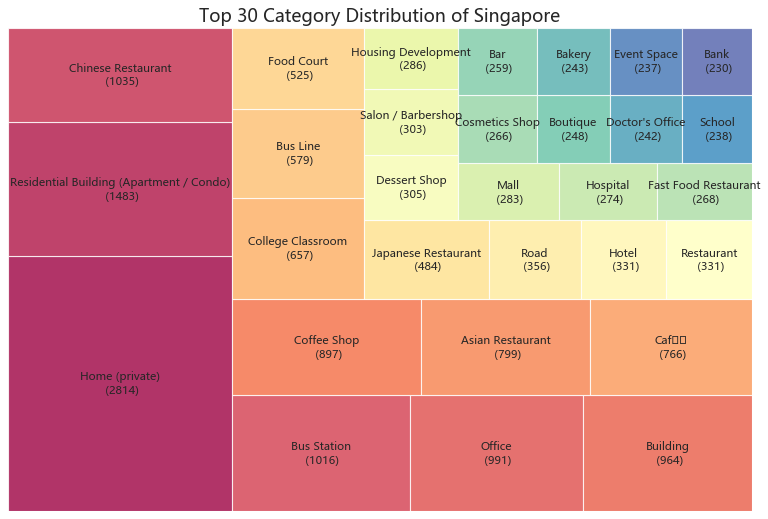

In [306]:
treemap(data=data,column = 'Category')

In [307]:
POI_category_count = data.groupby('Category').size().sort_values(ascending=False)
#print(POI_category_count.index.tolist())

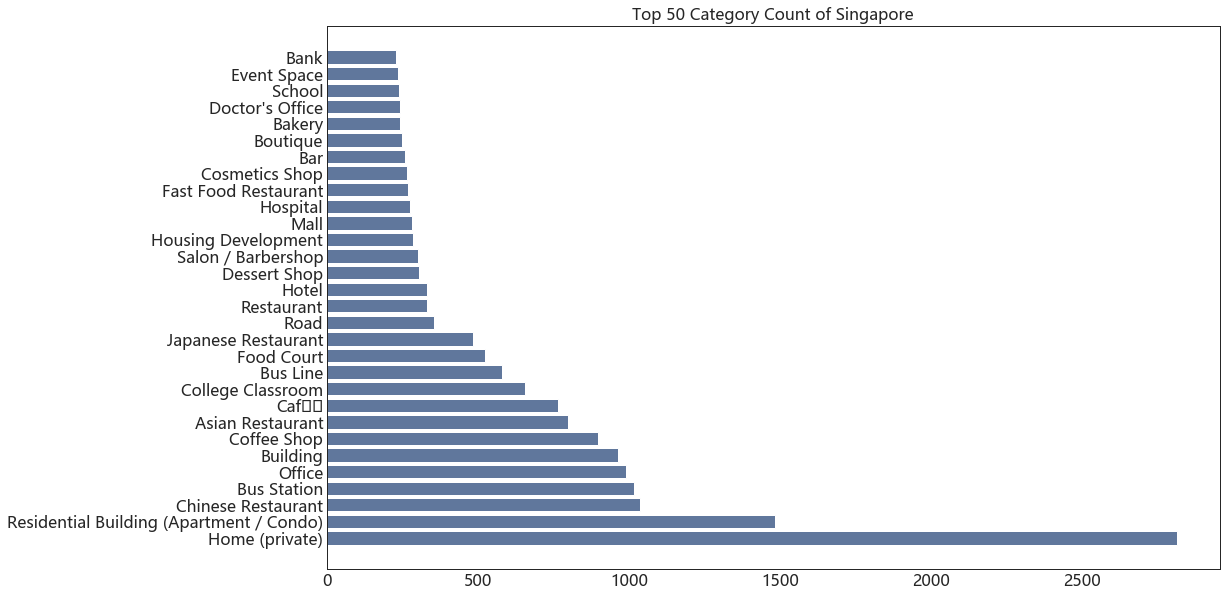

In [308]:
d = POI_category_count.index.tolist()
c = POI_category_count.tolist()
category = d[0:30]
count = c[0:30]

plt.barh(category, count)  # 横放条形图函数 barh
plt.title('Top 50 Category Count of Singapore')

plt.show()